In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import matplotlib.pyplot  as plt


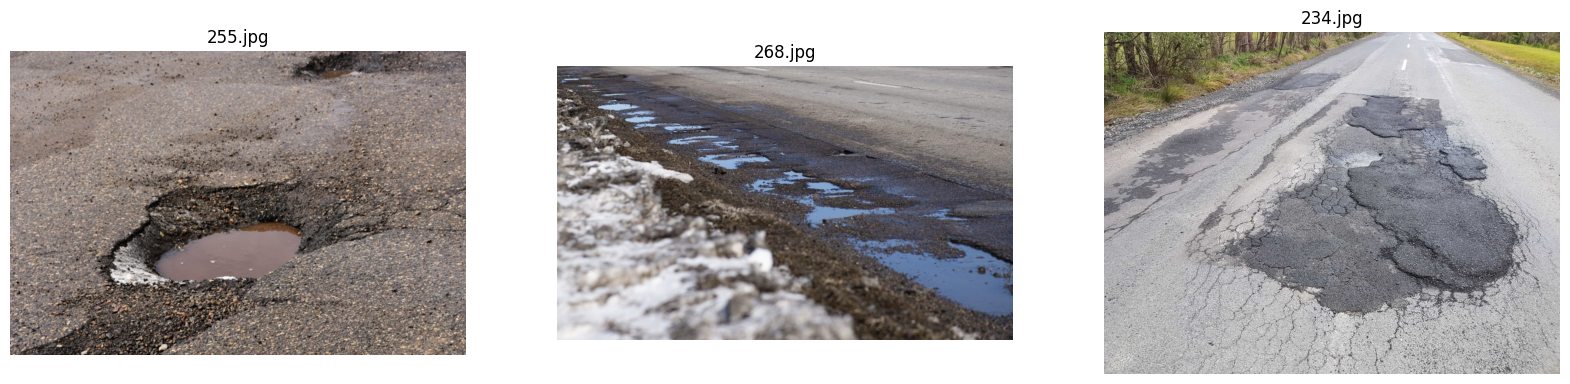

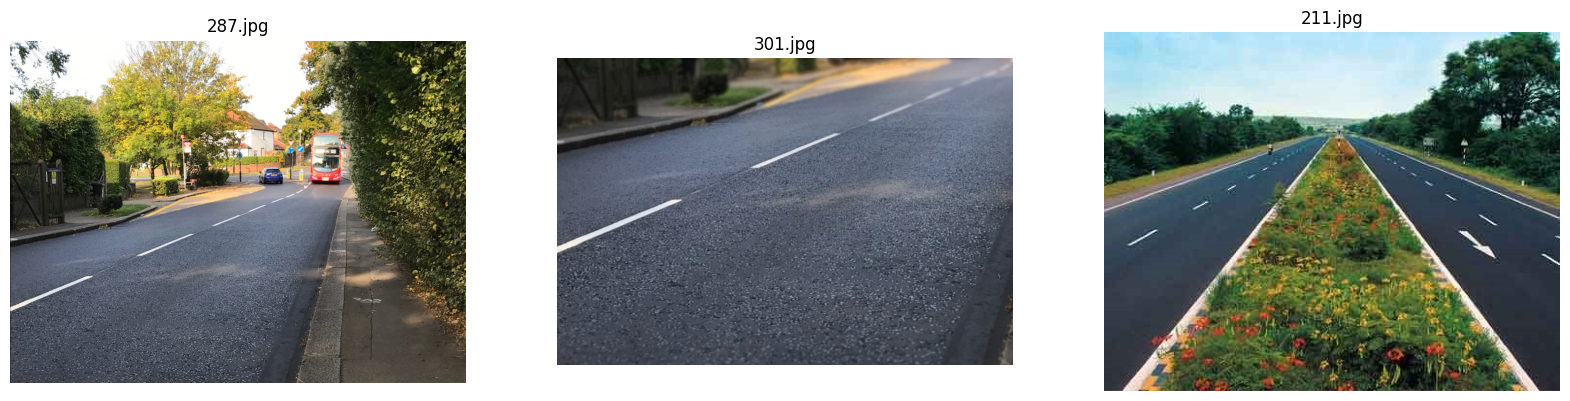

In [2]:
import os
import random

image_directory_pothole = "/kaggle/input/pothole-detection-dataset/potholes"
image_files_pothole = os.listdir(image_directory_pothole)

random_images_pothole = random.sample(image_files_pothole, 3)

plt.figure(figsize=(20, 15))
for i, image_name in enumerate(random_images_pothole):
    img_path = os.path.join(image_directory_pothole, image_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying correctly
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_name)

plt.show()

image_directory_normal = "/kaggle/input/pothole-detection-dataset/normal"
image_files_normal = os.listdir(image_directory_normal)

random_images_normal = random.sample(image_files_normal, 3)
plt.figure(figsize=(20, 15))
for i, image_name in enumerate(random_images_normal):
    img_path = os.path.join(image_directory_normal, image_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying correctly
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_name)
    
plt.show()


In [3]:
train_datagen= ImageDataGenerator(rescale= 1./255, 
                                  shear_range= 0.2, 
                                  zoom_range= 0.2, 
                                  horizontal_flip= True, 
                                  validation_split= 0.2)
training_set= train_datagen.flow_from_directory('/kaggle/input/pothole-detection-dataset',
                                               target_size= (112,112),
                                               batch_size= 32,
                                               class_mode= 'binary',
                                               subset='training')

Found 546 images belonging to 2 classes.


In [4]:
validation_generator= train_datagen.flow_from_directory(
    '/kaggle/input/pothole-detection-dataset',
    target_size=(112, 112),
    batch_size=32,
    class_mode= 'binary',
    subset='validation'
)

Found 135 images belonging to 2 classes.


In [5]:
model= tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[112,112,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
from keras.optimizers import Adam
optimizer= Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
history =model.fit(x= training_set, validation_data= validation_generator, epochs=20)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5769 - loss: 0.6785 - val_accuracy: 0.4889 - val_loss: 0.6826
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 865ms/step - accuracy: 0.6102 - loss: 0.6230 - val_accuracy: 0.7481 - val_loss: 0.5721
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 749ms/step - accuracy: 0.7873 - loss: 0.5490 - val_accuracy: 0.7630 - val_loss: 0.5203
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 749ms/step - accuracy: 0.7867 - loss: 0.4661 - val_accuracy: 0.7778 - val_loss: 0.4409
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 783ms/step - accuracy: 0.8662 - loss: 0.3734 - val_accuracy: 0.8148 - val_loss: 0.4195
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 807ms/step - accuracy: 0.8389 - loss: 0.3437 - val_accuracy: 0.7926 - val_loss: 0.4108
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 729ms/step - accuracy: 0.8536 - loss: 0.3180 - val_accuracy: 0.8148 - val_loss: 0.3611
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 766ms/step - accuracy: 0.9041 - loss: 0.2718 - val_accuracy: 0.8296 -

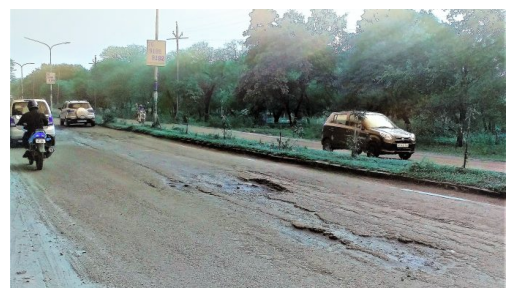

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
directory selected: potholes
image: 302.jpg
prediction:potholes


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
directory selected: normal
image: 107.jpg
prediction:normal


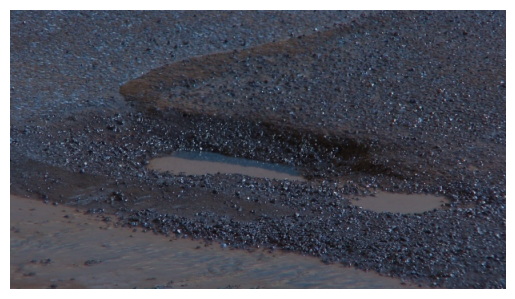

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
directory selected: potholes
image: 6.jpg
prediction:potholes


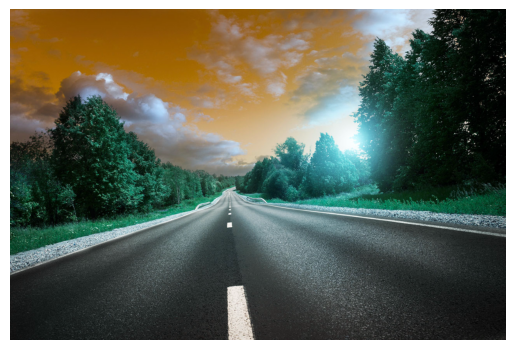

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
directory selected: normal
image: 39.jpg
prediction:normal


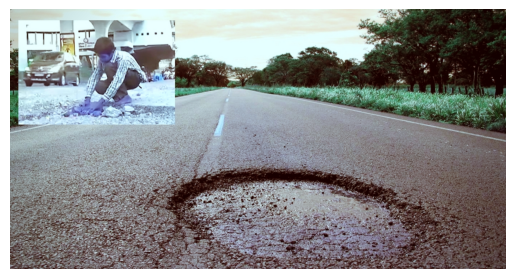

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
directory selected: potholes
image: 215.jpg
prediction:potholes


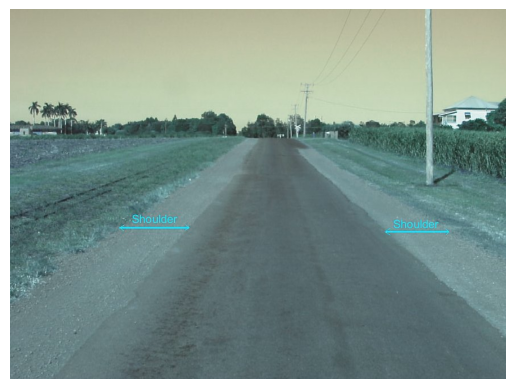

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
directory selected: normal
image: 326.jpg
prediction:normal


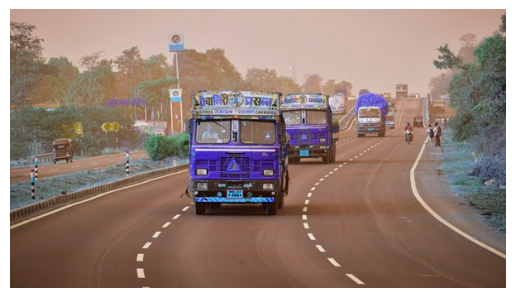

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
directory selected: normal
image: 273.jpg
prediction:normal


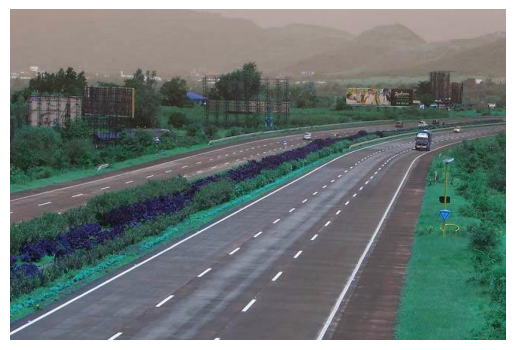

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
directory selected: normal
image: 35.jpg
prediction:normal


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
directory selected: normal
image: 325.jpg
prediction:potholes


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
directory selected: potholes
image: 61.jpg
prediction:potholes


In [8]:
from keras.preprocessing import image
base_image_dir = '/kaggle/input/pothole-detection-dataset/'
subdir= ['normal', 'potholes']

for i in range(10):
    random_dir= random.choice(subdir)

    image_dir= os.path.join(base_image_dir, random_dir)
    image_files= os.listdir(image_dir)
    
    random_image_file= random.choice(image_files)
    random_image_path= os.path.join(image_dir, random_image_file)
    
    test_image= image.load_img(random_image_path, target_size= (112,112))
    plt.imshow(cv2.imread(random_image_path))
    plt.axis('off')
    plt.show()
    
    test_img= image.img_to_array(test_image)
    test_image= np.expand_dims(test_image, axis=0)
    
    result= model.predict(test_image)
    
    
    if result[0][0]==1:
        prediction= 'potholes'
    else:
        prediction= 'normal'
    
    print(f'directory selected: {random_dir}')
    print(f'image: {random_image_file}')
    print(f'prediction:{prediction}')